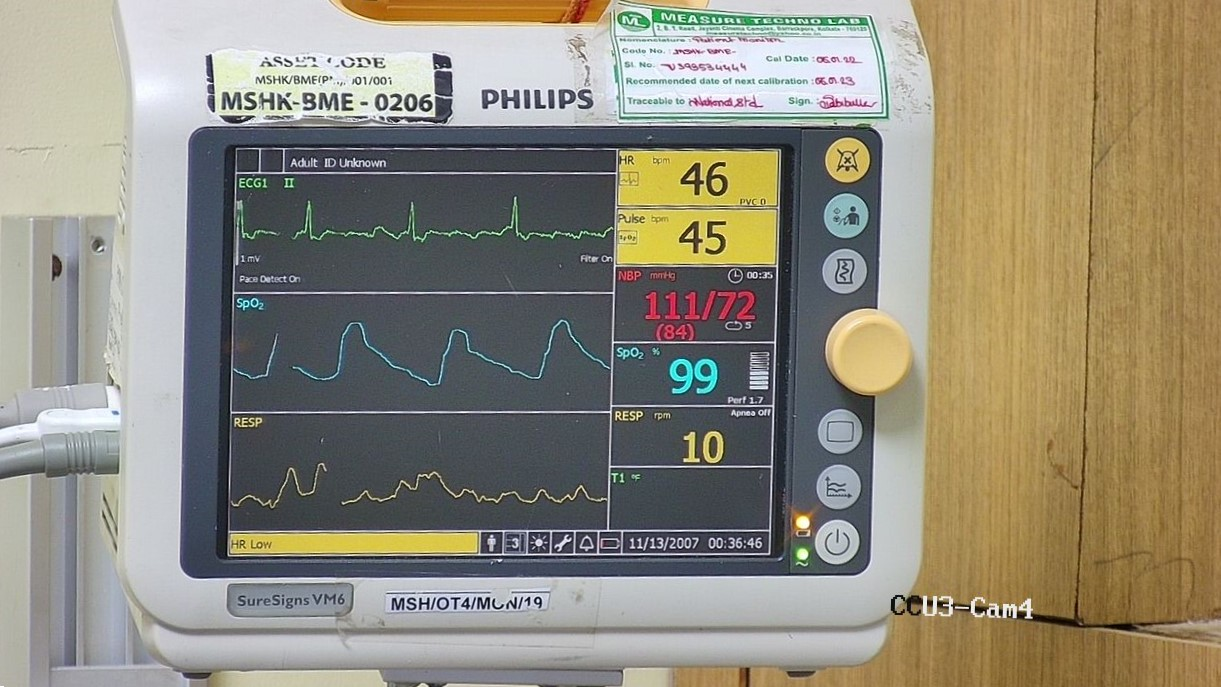

In [ ]:
image_path = "/content/medicakolkata_ccu3_mon--10_2022_5_30_19_4_16.jpeg"
image = cv2.imread(image_path)
cv2_imshow(image)

In [ ]:
with open('medicakolkata_ccu3_mon-10_2022_5_30_19_4_16_jpeg.rf.4a3d57d3396bfe6b2daaf9320bd67ae8.txt', 'r') as txt_file:
    lines = txt_file.readlines()

max_area = 0
selected_bbox = None

image_path = "/content/medicakolkata_ccu3_mon--10_2022_5_30_19_4_16.jpeg"
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

for line in lines:
    obj_data = line.strip().split()
    obj_class = obj_data[0]
    x_center, y_center, width, height = map(float, obj_data[1:])
    x = int((x_center - width/2) * image_width)
    y = int((y_center - height/2) * image_height)
    w = int(width * image_width)
    h = int(height * image_height)
    area = w * h
    if area > max_area:
        max_area = area
        selected_bbox = (x, y, w, h)
x, y, w, h = selected_bbox
cropped_image = image[y:y+h, x:x+w]

scale_factor = 1.5

resized_image = cv2.resize(cropped_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

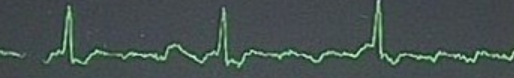

In [ ]:
cv2_imshow(resized_image)

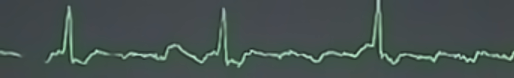

In [ ]:
from google.colab.patches import cv2_imshow

denoised_image = cv2.fastNlMeansDenoisingColored(resized_image, None, h=10, hColor=30, templateWindowSize=7, searchWindowSize=21)

cv2_imshow(denoised_image)

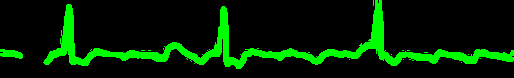

In [ ]:

# Convert the image to grayscale
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur for smoothing
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Define Prewitt operators
prewitt_x = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Compute the gradient magnitude
edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Thresholding
low_threshold = 40
high_threshold = 150
edges[edges < low_threshold] = 0
edges[edges > high_threshold] = 255

# Find contours in the edged image
contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a canvas
canvas = np.zeros_like(resized_image)

# Draw contours on the canvas
cv2.drawContours(canvas, contours, -1, (0, 255, 0), -1)  # You can change the color and thickness as per your preference

# Display the result
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()